In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=12)

In [2]:
## functions to calculate the pmt positions in the top and bottom arrays
# adapted from the XENON1T MC:
# G4ThreeVector Xenon1tDetectorConstruction::GetPMTsPositionTopArray(G4int iPMTNb)
# and
# G4ThreeVector Xenon1tDetectorConstruction::GetPMTsPositionBottomArray(G4int iPMTNb)

# Some constants taken from the XENON1T MC
PMT_distance_top = 7.95  # cm
PMT_distance_bottom = 8.0  # cm
PMTOuterRingRadius = 3.875  # cm

def get_pmt_positions_top(number):
    array = [i*6 for i in range(7)]
    array[0] = 1
    radius = [i*PMT_distance_top for i in range(7)]
    
    index1 = 0
    iTotal = array[0]
    while number > iTotal:
        index1 += 1
        iTotal += array[index1]

    index2 = number + array[index1] - iTotal
    
    x = radius[index1] * np.cos(index2*np.pi*2 / array[index1])
    y = radius[index1] * np.sin(index2*np.pi*2 / array[index1])
    return x, y

def get_pmt_positions_bottom(number):
    row_distance = np.sqrt(3.)/2. * PMT_distance_bottom
    n_rows = 13;
    n_pmts_top = 127
    
    array = [5, 8, 9, 10, 11, 12, 11, 12, 11, 10, 9, 8, 5]
    PMTsRowOffset = []
    
    for i in range(n_rows):
        PMTsRowOffset.append(-0.5*(array[i]-1)*PMT_distance_bottom)

    index1 = 0
    iTotal = array[0]
    while number > n_pmts_top+iTotal:
        index1 += 1
        iTotal += array[index1]
  
    index2 = number + array[index1] - iTotal -(n_pmts_top+1)
  
    x = PMTsRowOffset[index1] + (index2 * PMT_distance_bottom)
    y = ((0.5*(n_rows-1)-index1) * row_distance);
    return x, y

# rotate tuple over certain angle
def rotate(pos, angle):
    return (pos[0]*np.cos(angle) -pos[1]*np.sin(angle), pos[0]*np.sin(angle) + pos[1]*np.cos(angle))

In [3]:
positions_top = np.array([get_pmt_positions_top(i) for i in range(1, 128)])
# The rotation made is one quarter plus 1.5 PMT (so that pmts 1 and 2 are horizontal and pmts 10 and 11 are vertical)
rotation_angle_top = np.pi/2 + (3/72)*2*np.pi  # Is this the correct rotation?
positions_top = np.array([rotate(pos, rotation_angle_top) for pos in positions_top])

xs_top = positions_top[:,0]
ys_top = positions_top[:,1]

In [4]:
positions_bottom = np.array([get_pmt_positions_bottom(i) for i in range(128, 121+127+1)])
rotation_angle_bottom = np.pi/8  # Is this the correct rotation?
positions_bottom = np.array([rotate(pos, rotation_angle_bottom) for pos in positions_bottom])

xs_bottom = positions_bottom[:,0]
ys_bottom = positions_bottom[:,1]

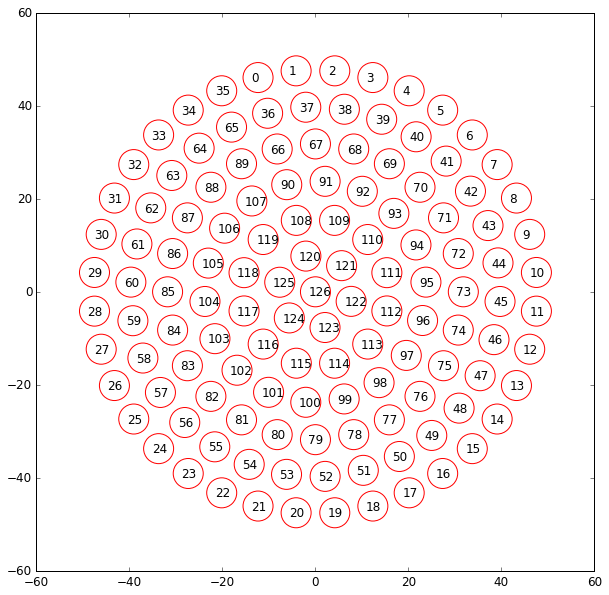

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(xs_top, ys_top, s=900, facecolors='none', edgecolors='r')
for i in range(127):
    # NOTE that the indices are in reverse
    plt.annotate(str(126-i), xy=(xs_top[i]-1.5, ys_top[i]-0.8))
plt.show()
# circle sizes are only an indication

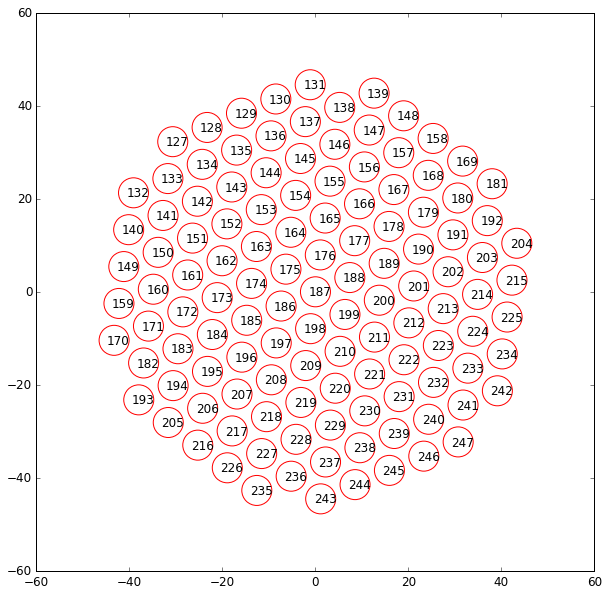

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(xs_bottom, ys_bottom, s=900, facecolors='none', edgecolors='r')
for i in range(121):
    plt.annotate(str(127+i), xy=(xs_bottom[i]-1.5, ys_bottom[i]-0.8))
plt.show()
# circle sizes are only an indication

In [7]:
# make the final list
# 127 top pmts + 121 bottom pmts
# print(len(positions_top))
# print(len(positions_bottom))

pmt_locations = []
for i in range(127):
    pmt_locations.append({'x': xs_top[127-1-i], 'y': ys_top[127-1-i]})
    
for i in range(121):
    pmt_locations.append({'x': xs_bottom[i], 'y': ys_bottom[i]})

In [8]:
len(pmt_locations)

248

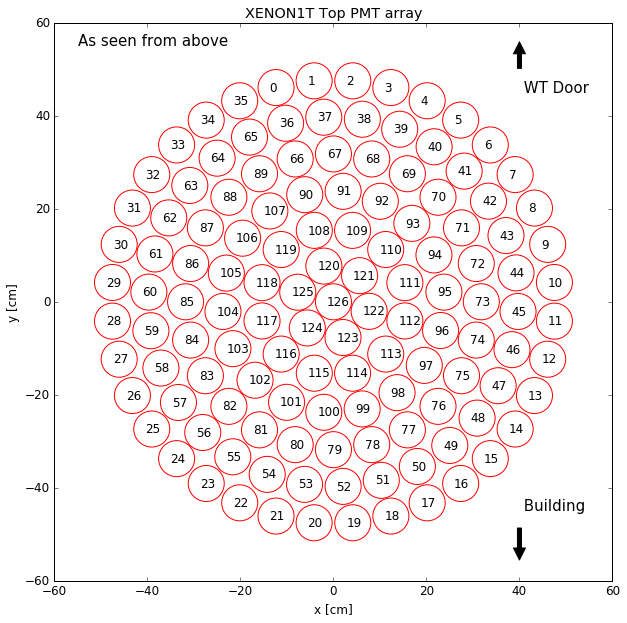

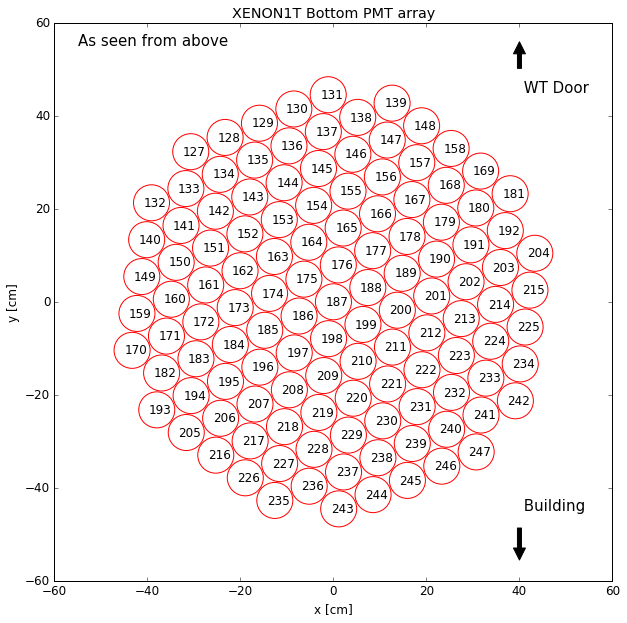

In [9]:
# double check once more by plot and add correct size PMT (3 inch diameter)
top_channels = list(range(0, 127))
bottom_channels = list(range(127, 247+1))

plot_radius = 60

plt.figure(figsize=(10,10))
plt.xlim((-plot_radius, plot_radius))
plt.ylim((-plot_radius, plot_radius))

for ch in top_channels:
    plt.gca().add_artist(plt.Circle((pmt_locations[ch]['x'],pmt_locations[ch]['y']), 
                                    PMTOuterRingRadius, 
                                    edgecolor='red', 
                                    fill=None))
    plt.annotate(str(ch), xy=(pmt_locations[ch]['x']-1.4,pmt_locations[ch]['y']-0.8))
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('XENON1T Top PMT array')
plt.annotate(' WT Door', fontsize=15, xy=(40, 58), xytext=(40, 45),
            arrowprops=dict(facecolor='black', shrink=0.2))
plt.annotate(' Building', fontsize=15, xy=(40, -58), xytext=(40, -45),
            arrowprops=dict(facecolor='black', shrink=0.2))
plt.text(-55, 55, 'As seen from above', fontsize=15)
#plt.savefig('XENON1T_Top.png', format='png', dpi=300)
plt.show()



plt.figure(figsize=(10,10))
plt.xlim((-plot_radius, plot_radius))
plt.ylim((-plot_radius, plot_radius))

for ch in bottom_channels:
    plt.gca().add_artist(plt.Circle((pmt_locations[ch]['x'],pmt_locations[ch]['y']), 
                                    PMTOuterRingRadius, 
                                    edgecolor='red', 
                                    fill=None))
    plt.annotate(str(ch), xy=(pmt_locations[ch]['x']-1.7,pmt_locations[ch]['y']-0.8))
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('XENON1T Bottom PMT array')
plt.annotate(' WT Door', fontsize=15, xy=(40, 58), xytext=(40, 45),
            arrowprops=dict(facecolor='black', shrink=0.2))
plt.annotate(' Building', fontsize=15, xy=(40, -58), xytext=(40, -45),
            arrowprops=dict(facecolor='black', shrink=0.2))
plt.text(-55, 55, 'As seen from above', fontsize=15)
#plt.savefig('XENON1T_Bottom.png', format='png', dpi=300)
plt.show()



In [10]:
pmt_locations

[{'x': -12.345668451390225, 'y': 46.074661913988564},
 {'x': -4.157328929063286, 'y': 47.518487098976266},
 {'x': 4.157328929063292, 'y': 47.51848709897626},
 {'x': 12.345668451390232, 'y': 46.07466191398856},
 {'x': 20.158891085031385, 'y': 43.230881441648194},
 {'x': 27.35959601394491, 'y': 39.073552512584904},
 {'x': 33.72899346259835, 'y': 33.72899346259828},
 {'x': 39.073552512584904, 'y': 27.35959601394491},
 {'x': 43.23088144164822, 'y': 20.158891085031343},
 {'x': 46.074661913988564, 'y': 12.345668451390226},
 {'x': 47.518487098976266, 'y': 4.157328929063288},
 {'x': 47.51848709897626, 'y': -4.157328929063292},
 {'x': 46.07466191398855, 'y': -12.34566845139027},
 {'x': 43.230881441648194, 'y': -20.158891085031385},
 {'x': 39.07355251258489, 'y': -27.359596013944923},
 {'x': 33.72899346259832, 'y': -33.72899346259832},
 {'x': 27.35959601394489, 'y': -39.07355251258491},
 {'x': 20.158891085031346, 'y': -43.23088144164822},
 {'x': 12.34566845139023, 'y': -46.074661913988564},
 {'x